In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape


(1025, 14)

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [7]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
x= df.drop(columns= 'target', axis= 1)
y= df['target']

In [9]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [10]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


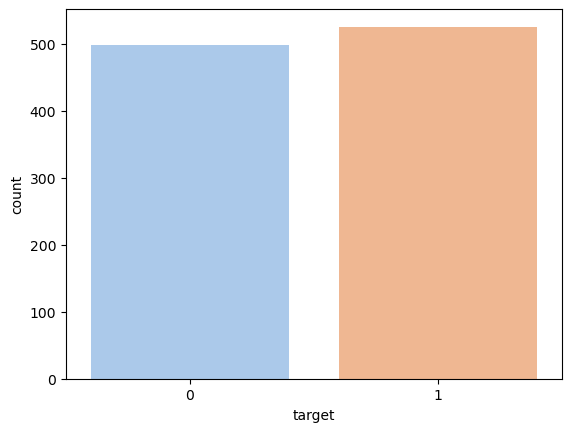

In [12]:
x= df.drop(columns= 'target', axis= 1)
y= df['target']
sns.countplot(data= df, x='target', palette= 'pastel')
plt.show()

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.3,random_state= 2)

In [14]:
print(x.shape,x_train.shape,x_test.shape)

(1025, 13) (717, 13) (308, 13)


In [15]:
model1= LogisticRegression()
model2= svm.SVC()
model3= RandomForestClassifier(max_depth=6, n_estimators=20, random_state=10)


In [16]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
result = encoder.fit_transform(x_train)

In [17]:
model1.fit(result,y_train)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model2.fit(result,y_train)

SVC()

In [19]:
model3.fit(result,y_train)


RandomForestClassifier(max_depth=6, n_estimators=20, random_state=10)

In [20]:
x_pre1= model1.predict(result)
x_pre2= model2.predict(result)
x_pre3= model3.predict(result)

train_data1= accuracy_score(x_pre1, y_train)
train_data2= accuracy_score(x_pre2, y_train)
train_data3= accuracy_score(x_pre3, y_train)


In [21]:
print(train_data1)

print(train_data2)

print(train_data3)



0.8493723849372385
0.7642956764295676
0.9762900976290098


In [22]:
test = encoder.fit_transform(x_test)

In [23]:
x_tes1= model1.predict(test)
x_tes2= model2.predict(test)
x_tes3= model3.predict(test)


test_data1= accuracy_score(x_tes1, y_test)
test_data2= accuracy_score(x_tes2, y_test)
test_data3= accuracy_score(x_tes3, y_test)


In [24]:
print(test_data1)

print(test_data2)

print(test_data3)




0.8474025974025974
0.7532467532467533
0.9090909090909091


In [26]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
in_data_array= np.asarray(input_data)
reshapes= in_data_array.reshape(1,-1)
prediction= model1.predict(reshapes)
print(prediction)
if(prediction[0]== 0):
  print('the person do not have a heart disease')
else:
  print('the person has a heart disease')

[1]
the person has a heart disease


In [27]:
# Take input from the user for each data point
age = float(input("Enter the age: "))
sex = float(input("Enter the sex (0 for female, 1 for male): "))
cp = float(input("Enter the chest pain type (1, 2, 3, or 4): "))
trestbps = float(input("Enter the resting blood pressure: "))
chol = float(input("Enter the serum cholesterol level: "))
fbs = float(input("Enter the fasting blood sugar (0 for false, 1 for true): "))
restecg = float(input("Enter the resting electrocardiographic results (0, 1, or 2): "))
thalach = float(input("Enter the maximum heart rate achieved: "))
exang = float(input("Enter exercise induced angina (0 for no, 1 for yes): "))
oldpeak = float(input("Enter the ST depression induced by exercise: "))
slope = float(input("Enter the slope of the peak exercise ST segment (0, 1, or 2): "))
ca = float(input("Enter the number of major vessels (0, 1, 2, 3, or 4): "))
thal = float(input("Enter the thalassemia type (1, 2, 3, or 0): "))

# Create the input_data as a tuple
input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

# Convert the input_data to a NumPy array and reshape it
in_data_array = np.asarray(input_data)
reshapes = in_data_array.reshape(1, -1)

# Assuming you have already defined the model3 object and trained the model
prediction = model1.predict(reshapes)

# Check the prediction and display the result
print(prediction)
if prediction[0] == 0:
    print('The person does not have a heart disease.')
else:
    print('The person has a heart disease.')


Enter the age: 41
Enter the sex (0 for female, 1 for male): 0
Enter the chest pain type (1, 2, 3, or 4): 1
Enter the resting blood pressure: 130
Enter the serum cholesterol level: 204
Enter the fasting blood sugar (0 for false, 1 for true): 0
Enter the resting electrocardiographic results (0, 1, or 2): 0
Enter the maximum heart rate achieved: 172
Enter exercise induced angina (0 for no, 1 for yes): 0
Enter the ST depression induced by exercise: 1.4
Enter the slope of the peak exercise ST segment (0, 1, or 2): 2
Enter the number of major vessels (0, 1, 2, 3, or 4): 0
Enter the thalassemia type (1, 2, 3, or 0): 2
[1]
The person has a heart disease.
